In [137]:
# importing required libraries

import numpy as np
import pandas as pd
import datetime
import math
import os


#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [138]:
%pwd
%cd "D:/Project (2)/"

#Load the dataset

# reading two csv files
data1 = pd.read_csv('product_details.csv')
data2 = pd.read_csv('pro_revenue.csv')
  
# using merge function by setting how='inner'
df = pd.merge(data1,data2,on='product type',how ='left')
  
# displaying result
df.head(10)

D:\Project (2)


,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,0,1,457,11,14190,890,open,1,0,1,5
1,0,1,457,11,5020,546,open,1,0,1,4
2,0,1,457,11,4782,523,open,1,0,1,3
3,0,1,457,11,5011,560,open,1,0,1,2
4,0,1,457,11,6102,612,open,1,0,1,1
5,0,1,457,11,0,0,close,0,0,0,7
6,0,1,457,11,4364,500,open,0,0,0,6
7,0,1,457,11,3706,459,open,0,0,0,5
8,0,1,457,11,3769,503,open,0,0,0,4
9,0,1,457,11,3464,463,open,0,0,0,3


In [139]:
df.shape

(1017209, 11)

In [133]:
df.head()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,0,1,457,11,14190,890,open,1,0,1,5
1,0,1,457,11,5020,546,open,1,0,1,4
2,0,1,457,11,4782,523,open,1,0,1,3
3,0,1,457,11,5011,560,open,1,0,1,2
4,0,1,457,11,6102,612,open,1,0,1,1


In [134]:
df.tail()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
1017204,1114,1115,454,14,4771,339,open,0,0,1,6
1017205,1114,1115,454,14,4540,326,open,0,0,1,5
1017206,1114,1115,454,14,4297,300,open,0,0,1,4
1017207,1114,1115,454,14,3697,305,open,0,0,1,3
1017208,1114,1115,454,14,0,0,close,0,1,1,2


# Exploratory Data Analysis

In [140]:
df.shape

(1017209, 11)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Unnamed: 0         1017209 non-null  int64 
 1   product type       1017209 non-null  int64 
 2   cost per unit      1017209 non-null  int64 
 3   Time for delivery  1017209 non-null  int64 
 4   Revenue            1017209 non-null  int64 
 5   No of purchases    1017209 non-null  int64 
 6   store status       1017209 non-null  object
 7   Promotion applied  1017209 non-null  int64 
 8   Generic Holiday    1017209 non-null  int64 
 9   Education Holiday  1017209 non-null  int64 
 10  DayOfWeek          1017209 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 93.1+ MB


# No missing values are found

In [142]:
# To get statistical data 

df.describe()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.574297e+02,5.584297e+02,1.012841e+03,9.543625e+00,5.773832e+03,6.331444e+02,3.815145e-01,3.052765e-02,1.786467e-01,3.998341e+00
std,3.219087e+02,3.219087e+02,5.655016e+02,2.857043e+00,3.849954e+03,4.644115e+02,4.857586e-01,1.720341e-01,3.830564e-01,1.997391e+00
min,0.000000e+00,1.000000e+00,5.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.790000e+02,2.800000e+02,5.020000e+02,7.000000e+00,3.727000e+03,4.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.570000e+02,5.580000e+02,1.023000e+03,1.000000e+01,5.744000e+03,6.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,8.370000e+02,8.380000e+02,1.519000e+03,1.200000e+01,7.856000e+03,8.370000e+02,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.114000e+03,1.115000e+03,1.999000e+03,1.400000e+01,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


In [143]:
df.columns

Index(['Unnamed: 0', 'product type', 'cost per unit', 'Time for delivery',
       'Revenue', 'No of purchases', 'store status', 'Promotion applied',
       'Generic Holiday', 'Education Holiday', 'DayOfWeek'],
      dtype='object')

In [144]:
df.isnull().sum()

Unnamed: 0           0
product type         0
cost per unit        0
Time for delivery    0
Revenue              0
No of purchases      0
store status         0
Promotion applied    0
Generic Holiday      0
Education Holiday    0
DayOfWeek            0
dtype: int64

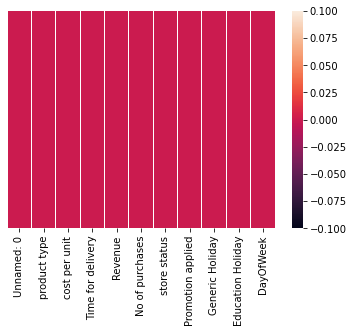

In [99]:
#we can also visualize null values with seaborn too. From the heatmap, it is clear that there are no null values.

sns.heatmap(df.isnull(),yticklabels=False)

# Checking for outliers

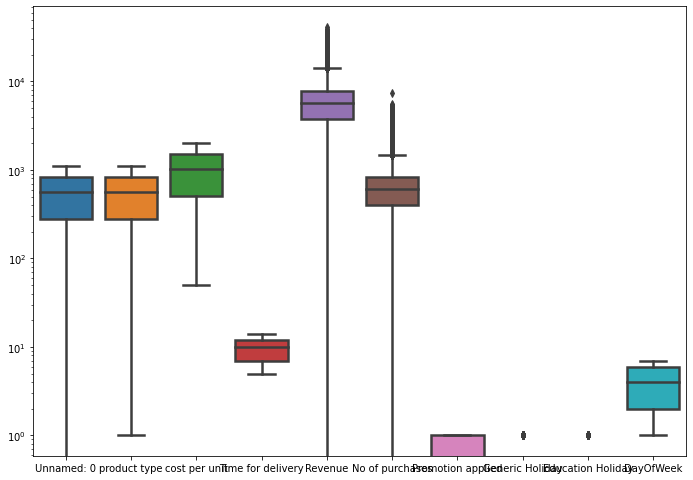

In [23]:
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

# Checking relation between all features

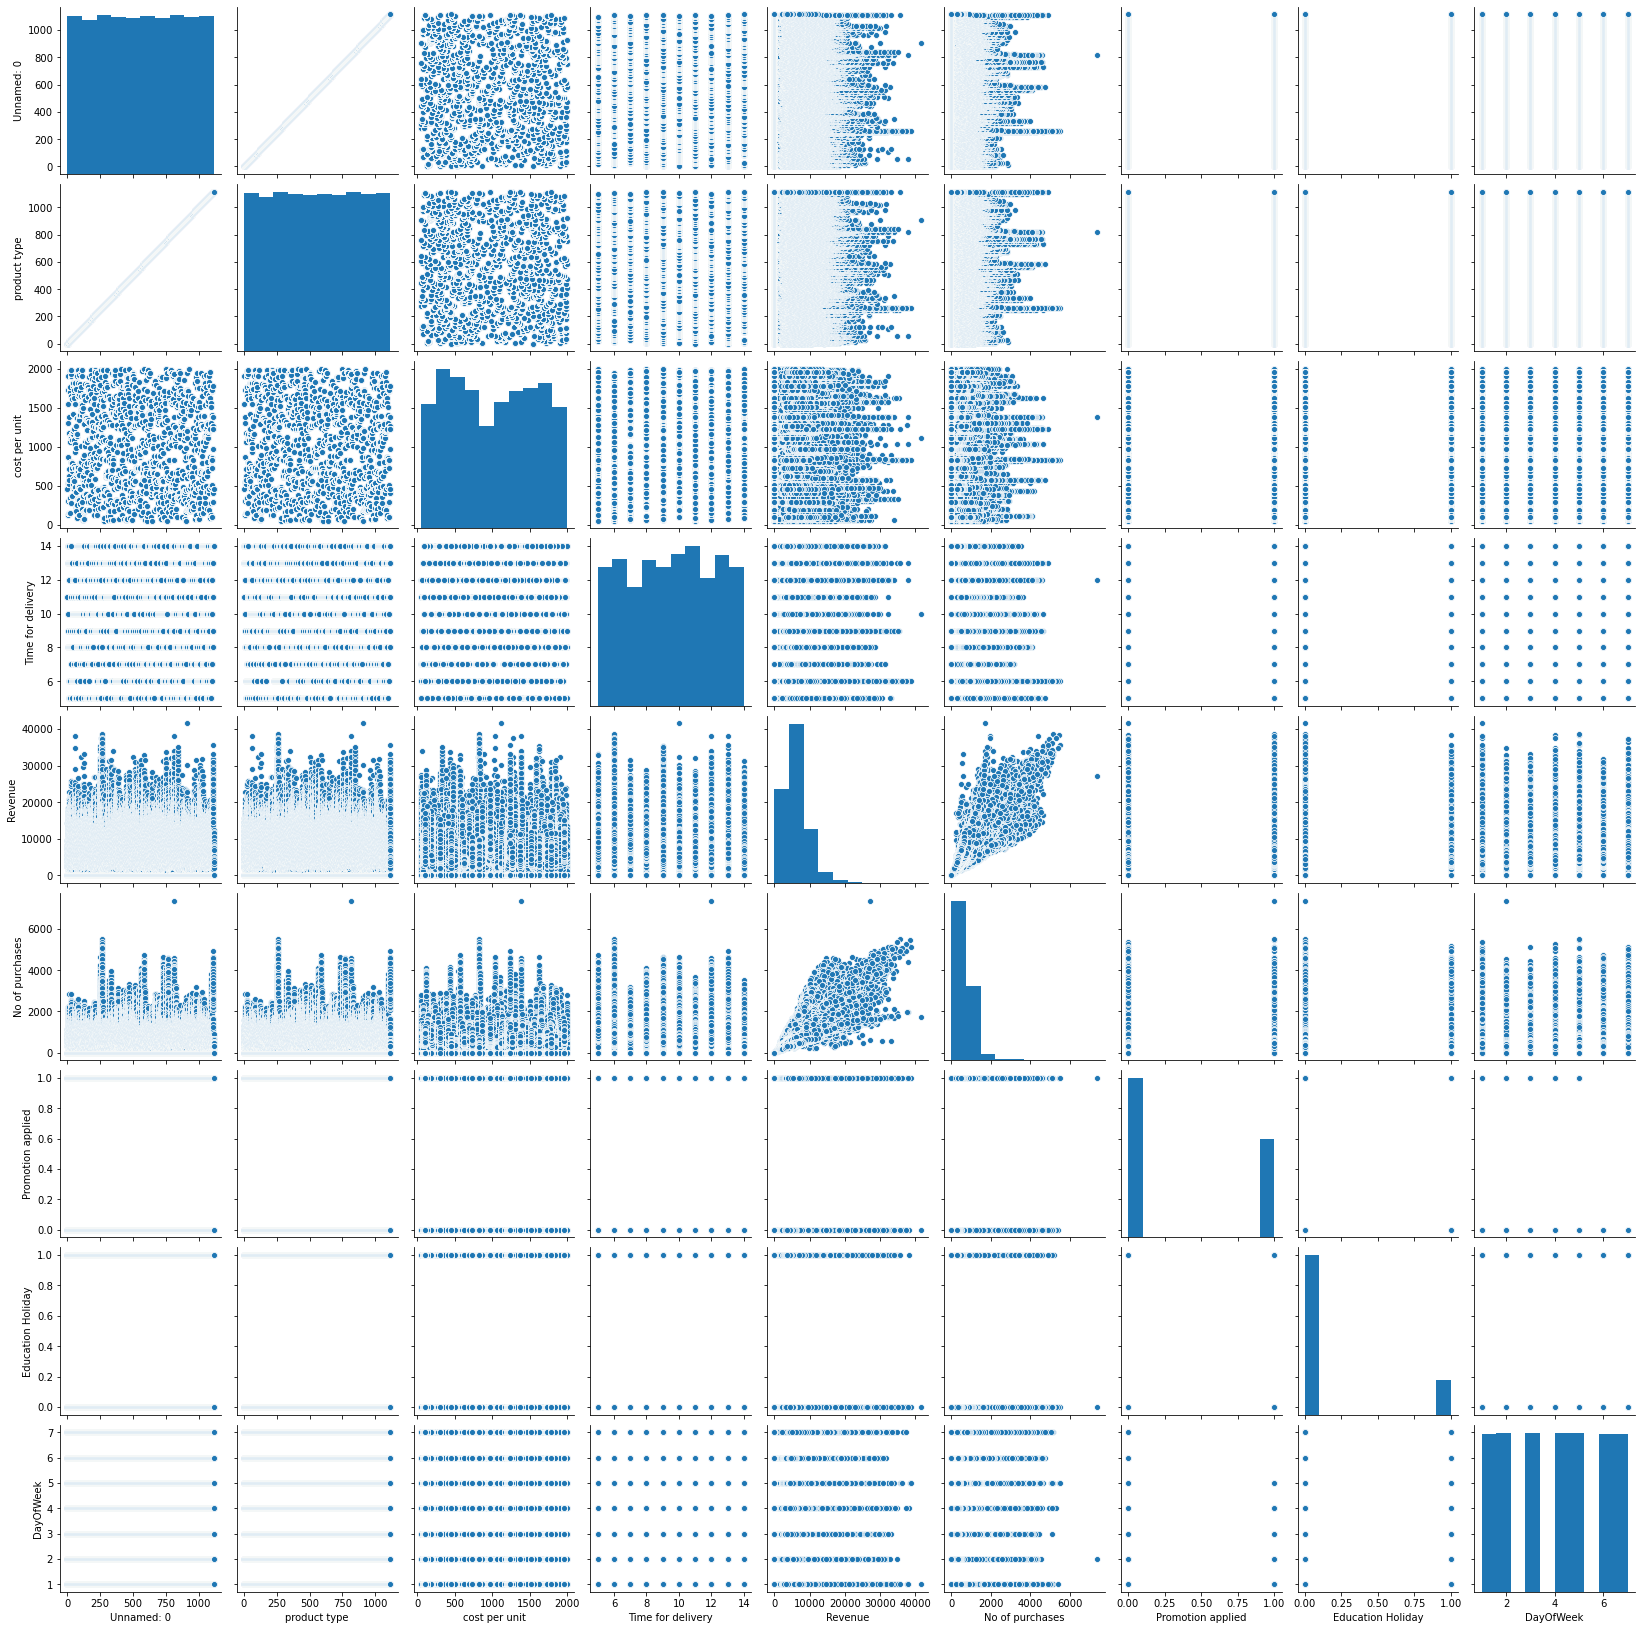

In [13]:
sns.pairplot(df)

In [145]:
df.corr()

,Unnamed: 0,product type,cost per unit,Time for delivery,Revenue,No of purchases,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
Unnamed: 0,1.000000,1.000000,-0.042775,-0.018510,0.005119,0.024331,0.000058,0.000537,0.000641,-0.000008
product type,1.000000,1.000000,-0.042775,-0.018510,0.005119,0.024331,0.000058,0.000537,0.000641,-0.000008
cost per unit,-0.042775,-0.042775,1.000000,0.020338,0.003452,0.000673,0.000008,-0.000084,0.001415,-0.000001
Time for delivery,-0.018510,-0.018510,0.020338,1.000000,-0.008501,0.003093,0.000016,-0.001020,-0.000055,-0.000002
Revenue,0.005119,0.005119,0.003452,-0.008501,1.000000,0.894702,0.452346,-0.254152,0.085136,-0.462120
No of purchases,0.024331,0.024331,0.000673,0.003093,0.894702,1.000000,0.316165,-0.226552,0.071564,-0.386447
Promotion applied,0.000058,0.000058,0.000008,0.000016,0.452346,0.316165,1.000000,-0.012331,0.067483,-0.392925
Generic Holiday,0.000537,0.000537,-0.000084,-0.001020,-0.254152,-0.226552,-0.012331,1.000000,0.148696,-0.052912
Education Holiday,0.000641,0.000641,0.001415,-0.000055,0.085136,0.071564,0.067483,0.148696,1.000000,-0.205388
DayOfWeek,-0.000008,-0.000008,-0.000001,-0.000002,-0.462120,-0.386447,-0.392925,-0.052912,-0.205388,1.000000


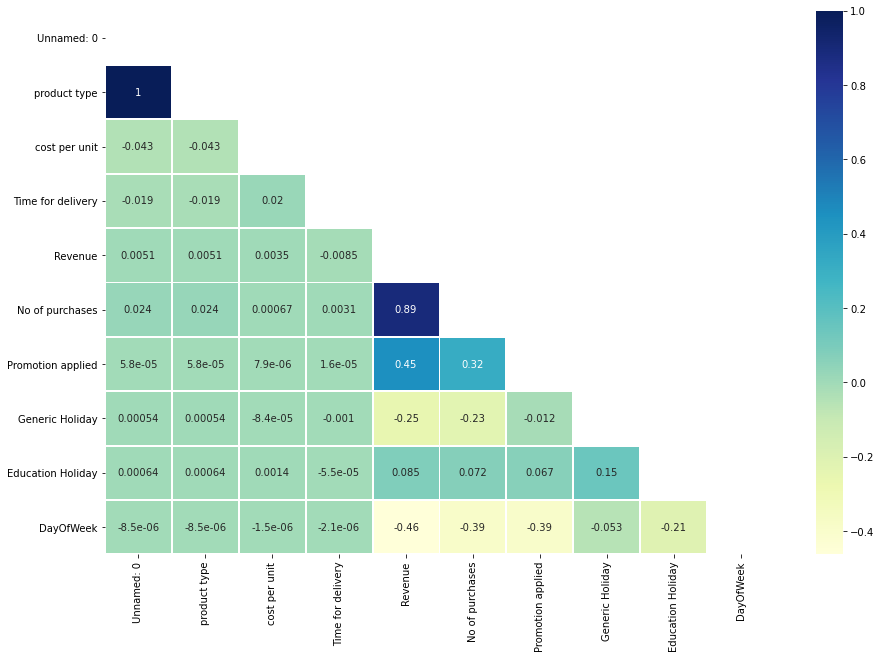

In [15]:
corr = df.corr()
mask = np.triu(corr)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', linewidths=1, annot=True)

# Preprocessing of Data

first column atrribute is not playing any role so we can drop that column

In [146]:
df=df.drop('Unnamed: 0', axis=1) 
df.head(2)

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,1,457,11,14190,890,open,1,0,1,5
1,1,457,11,5020,546,open,1,0,1,4


# Handling of Categorical Attributes

In [147]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'store status'.
df["store status"]= label_encoder.fit_transform(df["store status"])
  
df["store status"].unique()

array([1, 0])

In [148]:
df["store status"].value_counts()

1    844390
0    172819
Name: store status, dtype: int64

In [149]:
df["Generic Holiday"].unique()

array([0, 1], dtype=int64)

In [150]:
df["Generic Holiday"]=df["Generic Holiday"].replace(['a','b','c'],"1")
df["Generic Holiday"]=df["Generic Holiday"].replace(0,"0")
df["Generic Holiday"].value_counts()

0    986156
1     31053
Name: Generic Holiday, dtype: int64

In [151]:
df["Generic Holiday"].unique()

array(['0', 1], dtype=object)

In [153]:
df["Generic Holiday"] = df["Generic Holiday"].astype(str).astype(int)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   product type       1017209 non-null  int64
 1   cost per unit      1017209 non-null  int64
 2   Time for delivery  1017209 non-null  int64
 3   Revenue            1017209 non-null  int64
 4   No of purchases    1017209 non-null  int64
 5   store status       1017209 non-null  int32
 6   Promotion applied  1017209 non-null  int64
 7   Generic Holiday    1017209 non-null  int32
 8   Education Holiday  1017209 non-null  int64
 9   DayOfWeek          1017209 non-null  int64
dtypes: int32(2), int64(8)
memory usage: 77.6 MB


# Creating label by dividing Revenue by cost per unit

In [155]:
df["no_of_unit"]=(df["Revenue"]/df["cost per unit"])*0.1

In [156]:
df.head()

,product type,cost per unit,Time for delivery,Revenue,No of purchases,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,no_of_unit
0,1,457,11,14190,890,1,1,0,1,5,3.105033
1,1,457,11,5020,546,1,1,0,1,4,1.098468
2,1,457,11,4782,523,1,1,0,1,3,1.046389
3,1,457,11,5011,560,1,1,0,1,2,1.096499
4,1,457,11,6102,612,1,1,0,1,1,1.335230


In [157]:
df.shape

(1017209, 11)

# Feature Selection

In [158]:
df=df.drop(['No of purchases'], axis=1)

In [159]:
df.shape

(1017209, 10)

In [160]:
df.head()

,product type,cost per unit,Time for delivery,Revenue,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek,no_of_unit
0,1,457,11,14190,1,1,0,1,5,3.105033
1,1,457,11,5020,1,1,0,1,4,1.098468
2,1,457,11,4782,1,1,0,1,3,1.046389
3,1,457,11,5011,1,1,0,1,2,1.096499
4,1,457,11,6102,1,1,0,1,1,1.335230


# Box plot Before Removing outliers

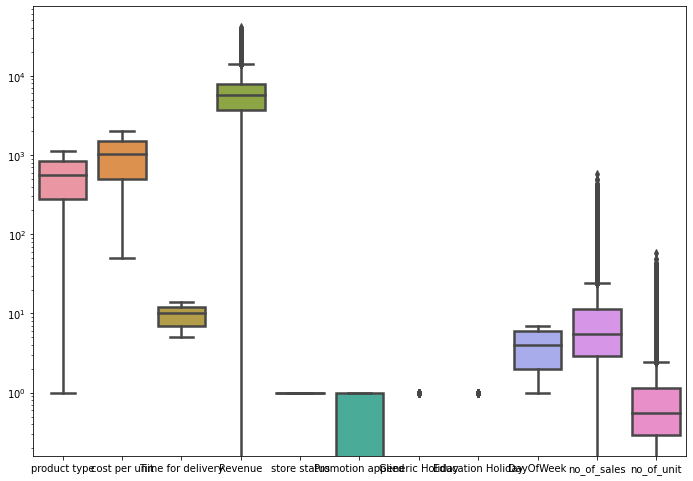

In [115]:
# To check outliers 
import matplotlib.pyplot as plt


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=df,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [161]:
#divide our data into training and test sets:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, random_state=0)

# Removing Outliers

# I. Method-IQR method (Box Plot)

In [162]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [163]:
train.shape

(813767, 10)

In [164]:
a = set()
for i in train.columns:
    lower, higher = outlier(train[i])
    l = train.loc[(train[i]<lower)| (train[i] > higher)].index
    for j in list(l):
        a.add(j)

In [165]:
print('Identified outliers: %d' % len(a))

Identified outliers: 344883


In [166]:
train.drop(a,axis = 0, inplace = True)

C:\Users\giris\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [167]:
train.shape

(468884, 10)

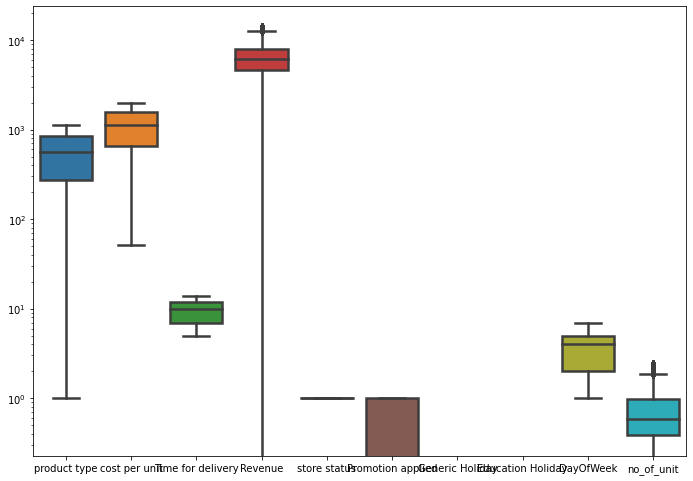

In [168]:
# To check outliers 
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=train,linewidth=2.5,ax=ax)
g.set_yscale("log")

In [170]:
#Preparing the Data
X_train = train.drop('no_of_unit', axis=1)
y_train = train['no_of_unit']

X_test = test.drop('no_of_unit', axis=1)
y_test = test['no_of_unit']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238CA1DCC70>,
      dtype=object)

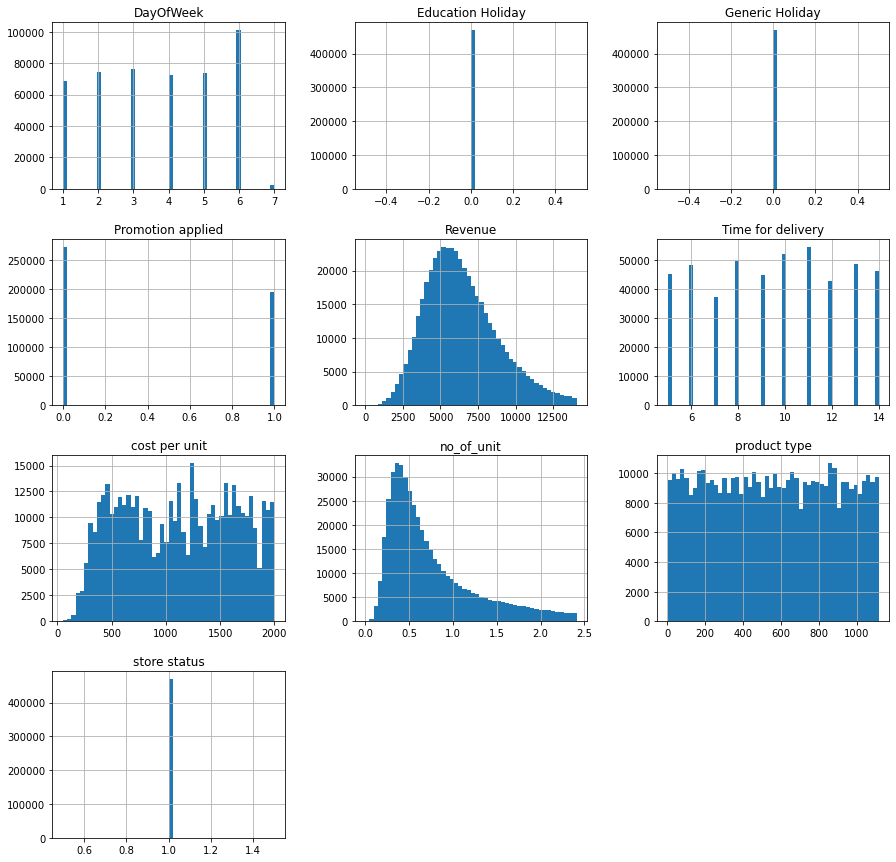

In [171]:
#plot Histogram
train.hist(bins=50, figsize=(15,15))

In [172]:
X_train.columns

Index(['product type', 'cost per unit', 'Time for delivery', 'Revenue',
       'store status', 'Promotion applied', 'Generic Holiday',
       'Education Holiday', 'DayOfWeek'],
      dtype='object')

# Standard Scaler Transform

In [173]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
#explicit conversion to pandas dataframe.
X_train = pd.DataFrame(X_train, columns=['product type', 'cost per unit', 'Time for delivery', 'Revenue',
        'store status', 'Promotion applied','Generic Holiday', 'Education Holiday', 'DayOfWeek'])

In [175]:
#explicit conversion to pandas dataframe.
X_test = pd.DataFrame(X_test, columns=['product type', 'cost per unit', 'Time for delivery', 'Revenue',
       'store status', 'Promotion applied', 'Generic Holiday','Education Holiday', 'DayOfWeek'])

In [176]:
X_train.head()

,product type,cost per unit,Time for delivery,Revenue,store status,Promotion applied,Generic Holiday,Education Holiday,DayOfWeek
0,-1.482302,1.550152,0.504433,0.474762,0.0,-0.845602,0.0,0.0,1.321931
1,-1.538049,-0.342357,0.856101,1.148037,0.0,1.182590,0.0,0.0,-1.527674
2,0.536981,1.131971,1.207768,0.458989,0.0,-0.845602,0.0,0.0,-0.387832
3,-0.887667,0.258656,-0.198902,0.093710,0.0,-0.845602,0.0,0.0,0.182089
4,0.087908,0.241150,1.207768,-0.961031,0.0,-0.845602,0.0,0.0,-0.387832


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C4E29DC0>,
      dtype=object)

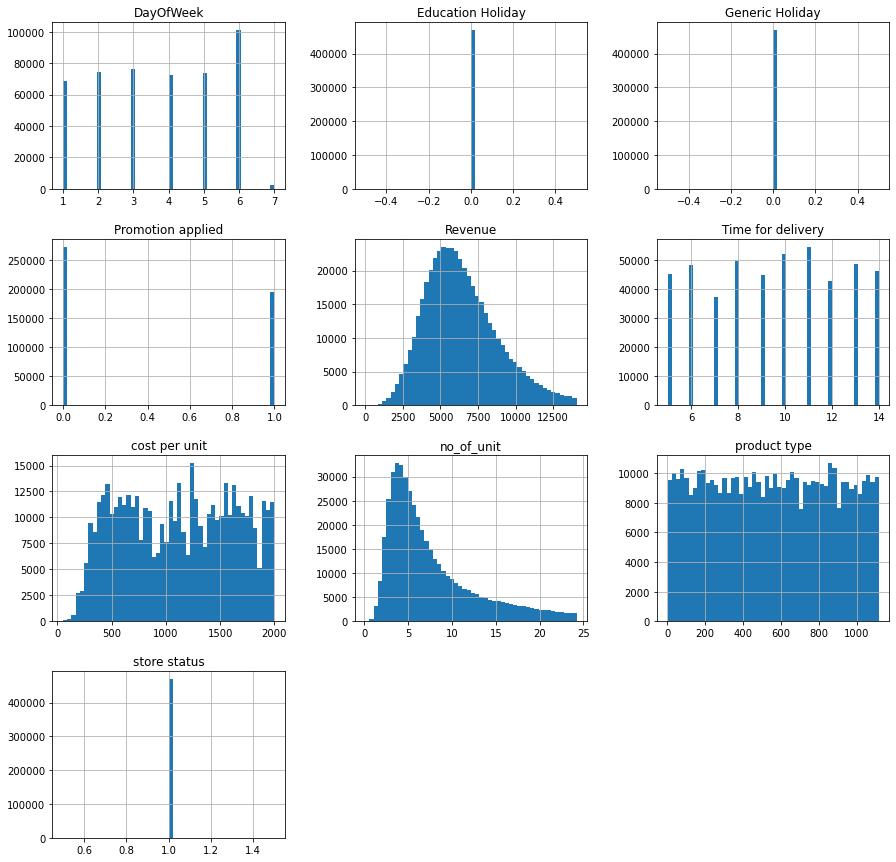

In [56]:
#plot Histogram
train.hist(bins=50, figsize=(15,15))

# Model Building Phase:

# 1.DecisionTreeRegressor Algorithm

In [177]:
#Training and Making Predictions
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print("DTRegressor Score: ", regressor.score(X_train,y_train))

DTRegressor Score:  1.0


In [178]:
#To make predictions on the test set, use the predict method:
y_pred = regressor.predict(X_test)

In [179]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
982497,0.877561,0.879268
719065,0.368523,0.369136
145542,1.155686,1.151563
252177,1.936176,1.934625
479489,0.000000,0.000000


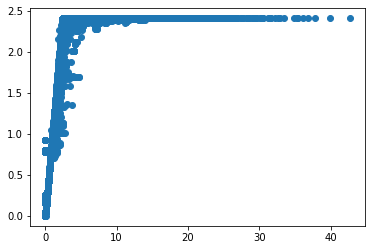

In [180]:
#checking predicted y and labeled Actual y using a scatter plot.
plt.scatter(y_test,y_pred)

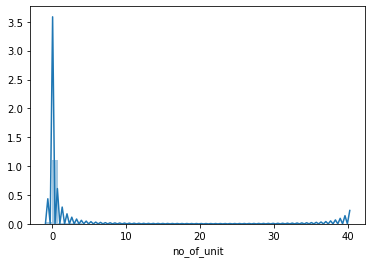

In [181]:
# checking difference between labled y and predicted y
sns.distplot(y_test-y_pred)

In [182]:
#Evaluating the Algorithm
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.510302618469117


# 2. Linear Regression:

In [183]:
X_train.shape, y_train.shape

((468884, 9), (468884,))

In [184]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lmmodel= lm.fit(X_train, y_train)
#To make predictions on the test set, use the predict method:
y_pred = lmmodel.predict(X_test)

In [185]:
lm.score(X_test, y_test)

0.25617872712447176

In [187]:
#Evaluating the Algorithm
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.657510891810942


In [186]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
982497,0.877561,1.066204
719065,0.368523,0.171871
145542,1.155686,1.190210
252177,1.936176,1.434948
479489,0.000000,-0.183731


# RandomForestRegressor

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()
rfmodel = rf.fit(X_train, y_train) # Fit 'rf' to the training set
y_pred = rfmodel.predict(X_test) # Predict the test set labels 'y_pred'
print("rf score: ",rf.score(X_test, y_test)) # Evaluate the test set 

#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r square:', metrics.r2_score(y_test,y_pred))

rf score:  0.3816286932027071
Mean Absolute Error: 0.31494677226394435
Mean Squared Error: 2.2839864160155283
Root Mean Squared Error: 1.5112863448121034
r square: 0.3816286932027071


In [69]:
#Now let's compare some of our predicted values with the actual values and see how accurate we were:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
982497,8.875610,8.886234
719065,3.785232,3.785396
145542,11.656863,11.645946
252177,19.461757,19.458247
479489,0.100000,0.101618


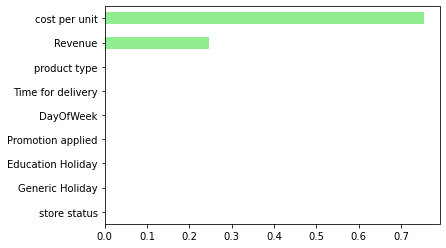

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_train.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen');
plt.show()

# Hyper Parameter Tuning

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(df) for df in np.linspace(start = 10, stop = 30, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(df) for df in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [196]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [199]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [200]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.8s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s remaining:    0.0s


[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.3s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.1s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  13.4s
[CV] n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=24, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.7s
[CV] n_estimators=28, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=28, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  19.8s
[CV] n_estimators=28, min_samples_split=10, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 11, 13, 15, 17, 19,
                                                         20, 22, 24, 26, 28,
                                                         30]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [201]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [202]:
p=rf_random.predict(X_test)

In [204]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.5112863448121034


In [203]:
#Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r square:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.31494677226394435
Mean Squared Error: 2.2839864160155283
Root Mean Squared Error: 1.5112863448121034
r square: 0.3816286932027071
